In [1]:
from util_comp import *
from scipy.cluster.hierarchy import dendrogram , linkage , fcluster
from sklearn.preprocessing import StandardScaler

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [2]:
data = main(one_hot=True)

Elapsed time to compute age categorisation: 0 minutes and 0 seconds
Elapsed time to compute correct systematic error: 0 minutes and 11 seconds
Elapsed time to compute load column names: 0 minutes and 0 seconds
Elapsed time to compute complete MICE imputation: 1 minutes and 32 seconds
Elapsed time to compute categorisation of outcome column: 0 minutes and 7 seconds
Elapsed time to compute change values in catagorical columns: 2 minutes and 4 seconds
Elapsed time to compute OneHotEncoding: 0 minutes and 1 seconds
Elapsed time to compute Full process: 3 minutes and 55 seconds


In [3]:
data.head()

,"Q4- (3 to 6 years old) In each of the following age groups, how many children live totally or partially with you?","Q4- (7 to 12 years old) In each of the following age groups, how many children live totally or partially with you?","Q4- (13 to 17 years old) In each of the following age groups, how many children live totally or partially with you?","Q4- (18 years and over) In each of the following age groups, how many children live totally or partially with you?",outcome,"(Q1- Your sex?_A man,)","(Q1- Your sex?_A woman,)","(Q1- Your sex?_None,)","(Q2- How old are you?_18 - 30,)","(Q2- How old are you?_30 - 39,)","(Q2- How old are you?_40 - 44,)","(Q2- How old are you?_45 - 49,)","(Q2- How old are you?_50 - 55,)","(Q2- How old are you?_56 - 70,)","(Q2- How old are you?_None,)","(STATUS_AM Technicians,)","(STATUS_Employees,)","(STATUS_Frames,)","(STATUS_Workers,)","(In which sector of activity do you work?_Construction,)","(In which sector of activity do you work?_Design office and engineering,)","(In which sector of activity do you work?_Human health and social action,)","(In which sector of activity do you work?_Industry,)","(In which sector of activity do you work?_Other businesses,)","(In which sector of activity do you work?_Retail business,)","(In which sector of activity do you work?_Services,)","(In which sector of activity do you work?_Transport, energy, telecommunications,)","(In which sector of activity do you work?_Wholesale trade (all businesses in 206),)","(What is the size of your business (in total, all locations combined)? 2009 fake_10 to 49 employees,)","(What is the size of your business (in total, all locations combined)? 2009 fake_1000 to 4999 employees,)","(What is the size of your business (in total, all locations combined)? 2009 fake_250 to 999 employees,)","(What is the size of your business (in total, all locations combined)? 2009 fake_50 to 249 employees,)","(What is the size of your business (in total, all locations combined)? 2009 fake_5000 employees and more,)","(What is the size of your business (in total, all locations combined)? 2009 fake_Less than 10 employees,)","(Q5- Apart from your children, do you have a dependent or sick family member(s) whom you take care of regularly?_No,)","(Q5- Apart from your children, do you have a dependent or sick family member(s) whom you take care of regularly?_Yes, who lives elsewhere,)","(Q5- Apart from your children, do you have a dependent or sick family member(s) whom you take care of regularly?_Yes, who lives with me,)","(Q5- Apart from your children, do you have a dependent or sick family member(s) whom you take care of regularly?_None,)","(Would you say that over the last 12 months, your company's activity has:_Accelerated,)","(Would you say that over the last 12 months, your company's activity has:_Do not know,)","(Would you say that over the last 12 months, your company's activity has:_Slow down,)","(Would you say that over the last 12 months, your company's activity has:_Stabilized,)","(Would you say that over the last 12 months, your company's activity has:_None,)","(Would you say that over the last 12 months, your company's activity has:_nan,)","(Q9- Are you working?_Part time,)","(Q10- Do you have shift work (work organized in successive teams, which take turns at the same workstations) with alternating hours?_No,)","(Q10- Do you have shift work (work organized in successive teams, which take turns at the same workstations) with alternating hours?_Yes,)","(Q10- Do you have shift work (work organized in successive teams, which take turns at the same workstations) with alternating hours?_None,)","(Q12- Do you work most often?_At customers,)","(Q12- Do you work most often?_At home teleworking,)","(Q12- Do you work most often?_In a commercial premises or agency,)","(Q12- Do you work most often?_In a shared office (3 to 5 people),)","(Q12- Do you work most often?_In a shared work space - co-working,)","(Q12- Do you work most often?_In a vehicle,)","(Q12-

In [4]:
data.describe()

,"Q4- (3 to 6 years old) In each of the following age groups, how many children live totally or partially with you?","Q4- (7 to 12 years old) In each of the following age groups, how many children live totally or partially with you?","Q4- (13 to 17 years old) In each of the following age groups, how many children live totally or partially with you?","Q4- (18 years and over) In each of the following age groups, how many children live totally or partially with you?",outcome,"(Q1- Your sex?_A man,)","(Q1- Your sex?_A woman,)","(Q1- Your sex?_None,)","(Q2- How old are you?_18 - 30,)","(Q2- How old are you?_30 - 39,)","(Q2- How old are you?_40 - 44,)","(Q2- How old are you?_45 - 49,)","(Q2- How old are you?_50 - 55,)","(Q2- How old are you?_56 - 70,)","(Q2- How old are you?_None,)","(STATUS_AM Technicians,)","(STATUS_Employees,)","(STATUS_Frames,)","(STATUS_Workers,)","(In which sector of activity do you work?_Construction,)","(In which sector of activity do you work?_Design office and engineering,)","(In which sector of activity do you work?_Human health and social action,)","(In which sector of activity do you work?_Industry,)","(In which sector of activity do you work?_Other businesses,)","(In which sector of activity do you work?_Retail business,)","(In which sector of activity do you work?_Services,)","(In which sector of activity do you work?_Transport, energy, telecommunications,)","(In which sector of activity do you work?_Wholesale trade (all businesses in 206),)","(What is the size of your business (in total, all locations combined)? 2009 fake_10 to 49 employees,)","(What is the size of your business (in total, all locations combined)? 2009 fake_1000 to 4999 employees,)","(What is the size of your business (in total, all locations combined)? 2009 fake_250 to 999 employees,)","(What is the size of your business (in total, all locations combined)? 2009 fake_50 to 249 employees,)","(What is the size of your business (in total, all locations combined)? 2009 fake_5000 employees and more,)","(What is the size of your business (in total, all locations combined)? 2009 fake_Less than 10 employees,)","(Q5- Apart from your children, do you have a dependent or sick family member(s) whom you take care of regularly?_No,)","(Q5- Apart from your children, do you have a dependent or sick family member(s) whom you take care of regularly?_Yes, who lives elsewhere,)","(Q5- Apart from your children, do you have a dependent or sick family member(s) whom you take care of regularly?_Yes, who lives with me,)","(Q5- Apart from your children, do you have a dependent or sick family member(s) whom you take care of regularly?_None,)","(Would you say that over the last 12 months, your company's activity has:_Accelerated,)","(Would you say that over the last 12 months, your company's activity has:_Do not know,)","(Would you say that over the last 12 months, your company's activity has:_Slow down,)","(Would you say that over the last 12 months, your company's activity has:_Stabilized,)","(Would you say that over the last 12 months, your company's activity has:_None,)","(Would you say that over the last 12 months, your company's activity has:_nan,)","(Q9- Are you working?_Part time,)","(Q10- Do you have shift work (work organized in successive teams, which take turns at the same workstations) with alternating hours?_No,)","(Q10- Do you have shift work (work organized in successive teams, which take turns at the same workstations) with alternating hours?_Yes,)","(Q10- Do you have shift work (work organized in successive teams, which take turns at the same workstations) with alternating hours?_None,)","(Q12- Do you work most often?_At customers,)","(Q12- Do you work most often?_At home teleworking,)","(Q12- Do you work most often?_In a commercial premises or agency,)","(Q12- Do you work most often?_In a shared office (3 to 5 people),)","(Q12- Do you work most often?_In a shared work space - co-working,)","(Q12- Do you work most often?_In a vehicle,)","(Q12-

In [5]:
not_cat = [
    "Q4- (3 to 6 years old) In each of the following age groups, how many children live totally or partially with you?",
    "Q4- (7 to 12 years old) In each of the following age groups, how many children live totally or partially with you?",
    "Q4- (13 to 17 years old) In each of the following age groups, how many children live totally or partially with you?",
    "Q4- (18 years and over) In each of the following age groups, how many children live totally or partially with you?",
    "outcome"
]

# catagorical columns (everything other than the non_categorical columns)
categorical_cols = [col for col in data.columns if col not in not_cat]

In [6]:
# df_features = data.drop(categorical_cols, axis=1)
df_features = data.drop("outcome", axis=1)
df_features.columns = [str(col) for col in df_features.columns]

# Standardize features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_features)
df_scaled = pd.DataFrame(df_scaled ,columns=df_features.columns)

In [7]:
# Transpose so that each row is a feature
df_transposed = df_scaled.transpose()

np.shape(df_transposed)

(426, 44535)

In [8]:
# Perform hierarchical clustering on features
linked = linkage(df_transposed , method='ward', metric='euclidean')

np.shape(linked)

(425, 4)

In [9]:
df_linked = pd.DataFrame(linked, columns=['c1','c2','distance','size']) 
# c1 and c2 are the two clusters that are being joined
# distance is the distance between the two clusters
# size is the number of features in the cluster

df_linked[['c1','c2','size']] = df_linked[['c1','c2','size']].astype('int')
df_linked[['count']] = 0

for i in range(1,len(df_linked)):
    df_linked.loc[i, 'count'] = df_linked.loc[i-1, 'count'] + df_linked.loc[i, 'size']

df_linked[0:35]

,c1,c2,distance,size,count
0,398,403,185.821586,2,0
1,59,64,188.996700,2,2
2,89,92,192.545859,2,4
3,88,91,192.682389,2,6
4,136,157,206.858371,2,8
5,101,141,208.901737,2,10
6,175,180,212.547485,2,12
7,176,181,212.664384,2,14
8,58,112,213.189976,2,16
9,17,53,214.652054,2,18


In [10]:
from scipy.cluster.hierarchy import inconsistent

incons = inconsistent(linked)
print(incons)

[[1.85821586e+02 0.00000000e+00 1.00000000e+00 0.00000000e+00]
 [1.88996700e+02 1.01483547e-06 1.00000000e+00 0.00000000e+00]
 [1.92545859e+02 0.00000000e+00 1.00000000e+00 0.00000000e+00]
 ...
 [5.40687608e+02 1.06024538e+02 3.00000000e+00 1.13695804e+00]
 [6.48618864e+02 4.47725777e+01 3.00000000e+00 8.28907252e-01]
 [7.58581071e+02 1.95174446e+02 3.00000000e+00 1.13294174e+00]]


In [11]:
# !pip install gap-stat
from gap_statistic import OptimalK

optimalK = OptimalK(parallel_backend='joblib')
n_clusters = optimalK(df_transposed, cluster_array=np.arange(1, 60))
print(f"Optimal number of clusters: {n_clusters}")


Optimal number of clusters: 57


In [12]:
# threshold for optimal number of clusters
threshold = 0

for i in range(1, len(df_linked)):
    if (df_linked.loc[i, 'count']) > n_clusters:
        threshold = df_linked.loc[i, 'distance']
        break

print(f"Threshold for optimal number of clusters: {threshold}")

Threshold for optimal number of clusters: 233.53607403191484


In [13]:
# number of clusters based on threshold

clusters = fcluster(linked, n_clusters, criterion='maxclust')
np.unique(clusters)


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57], dtype=int32)

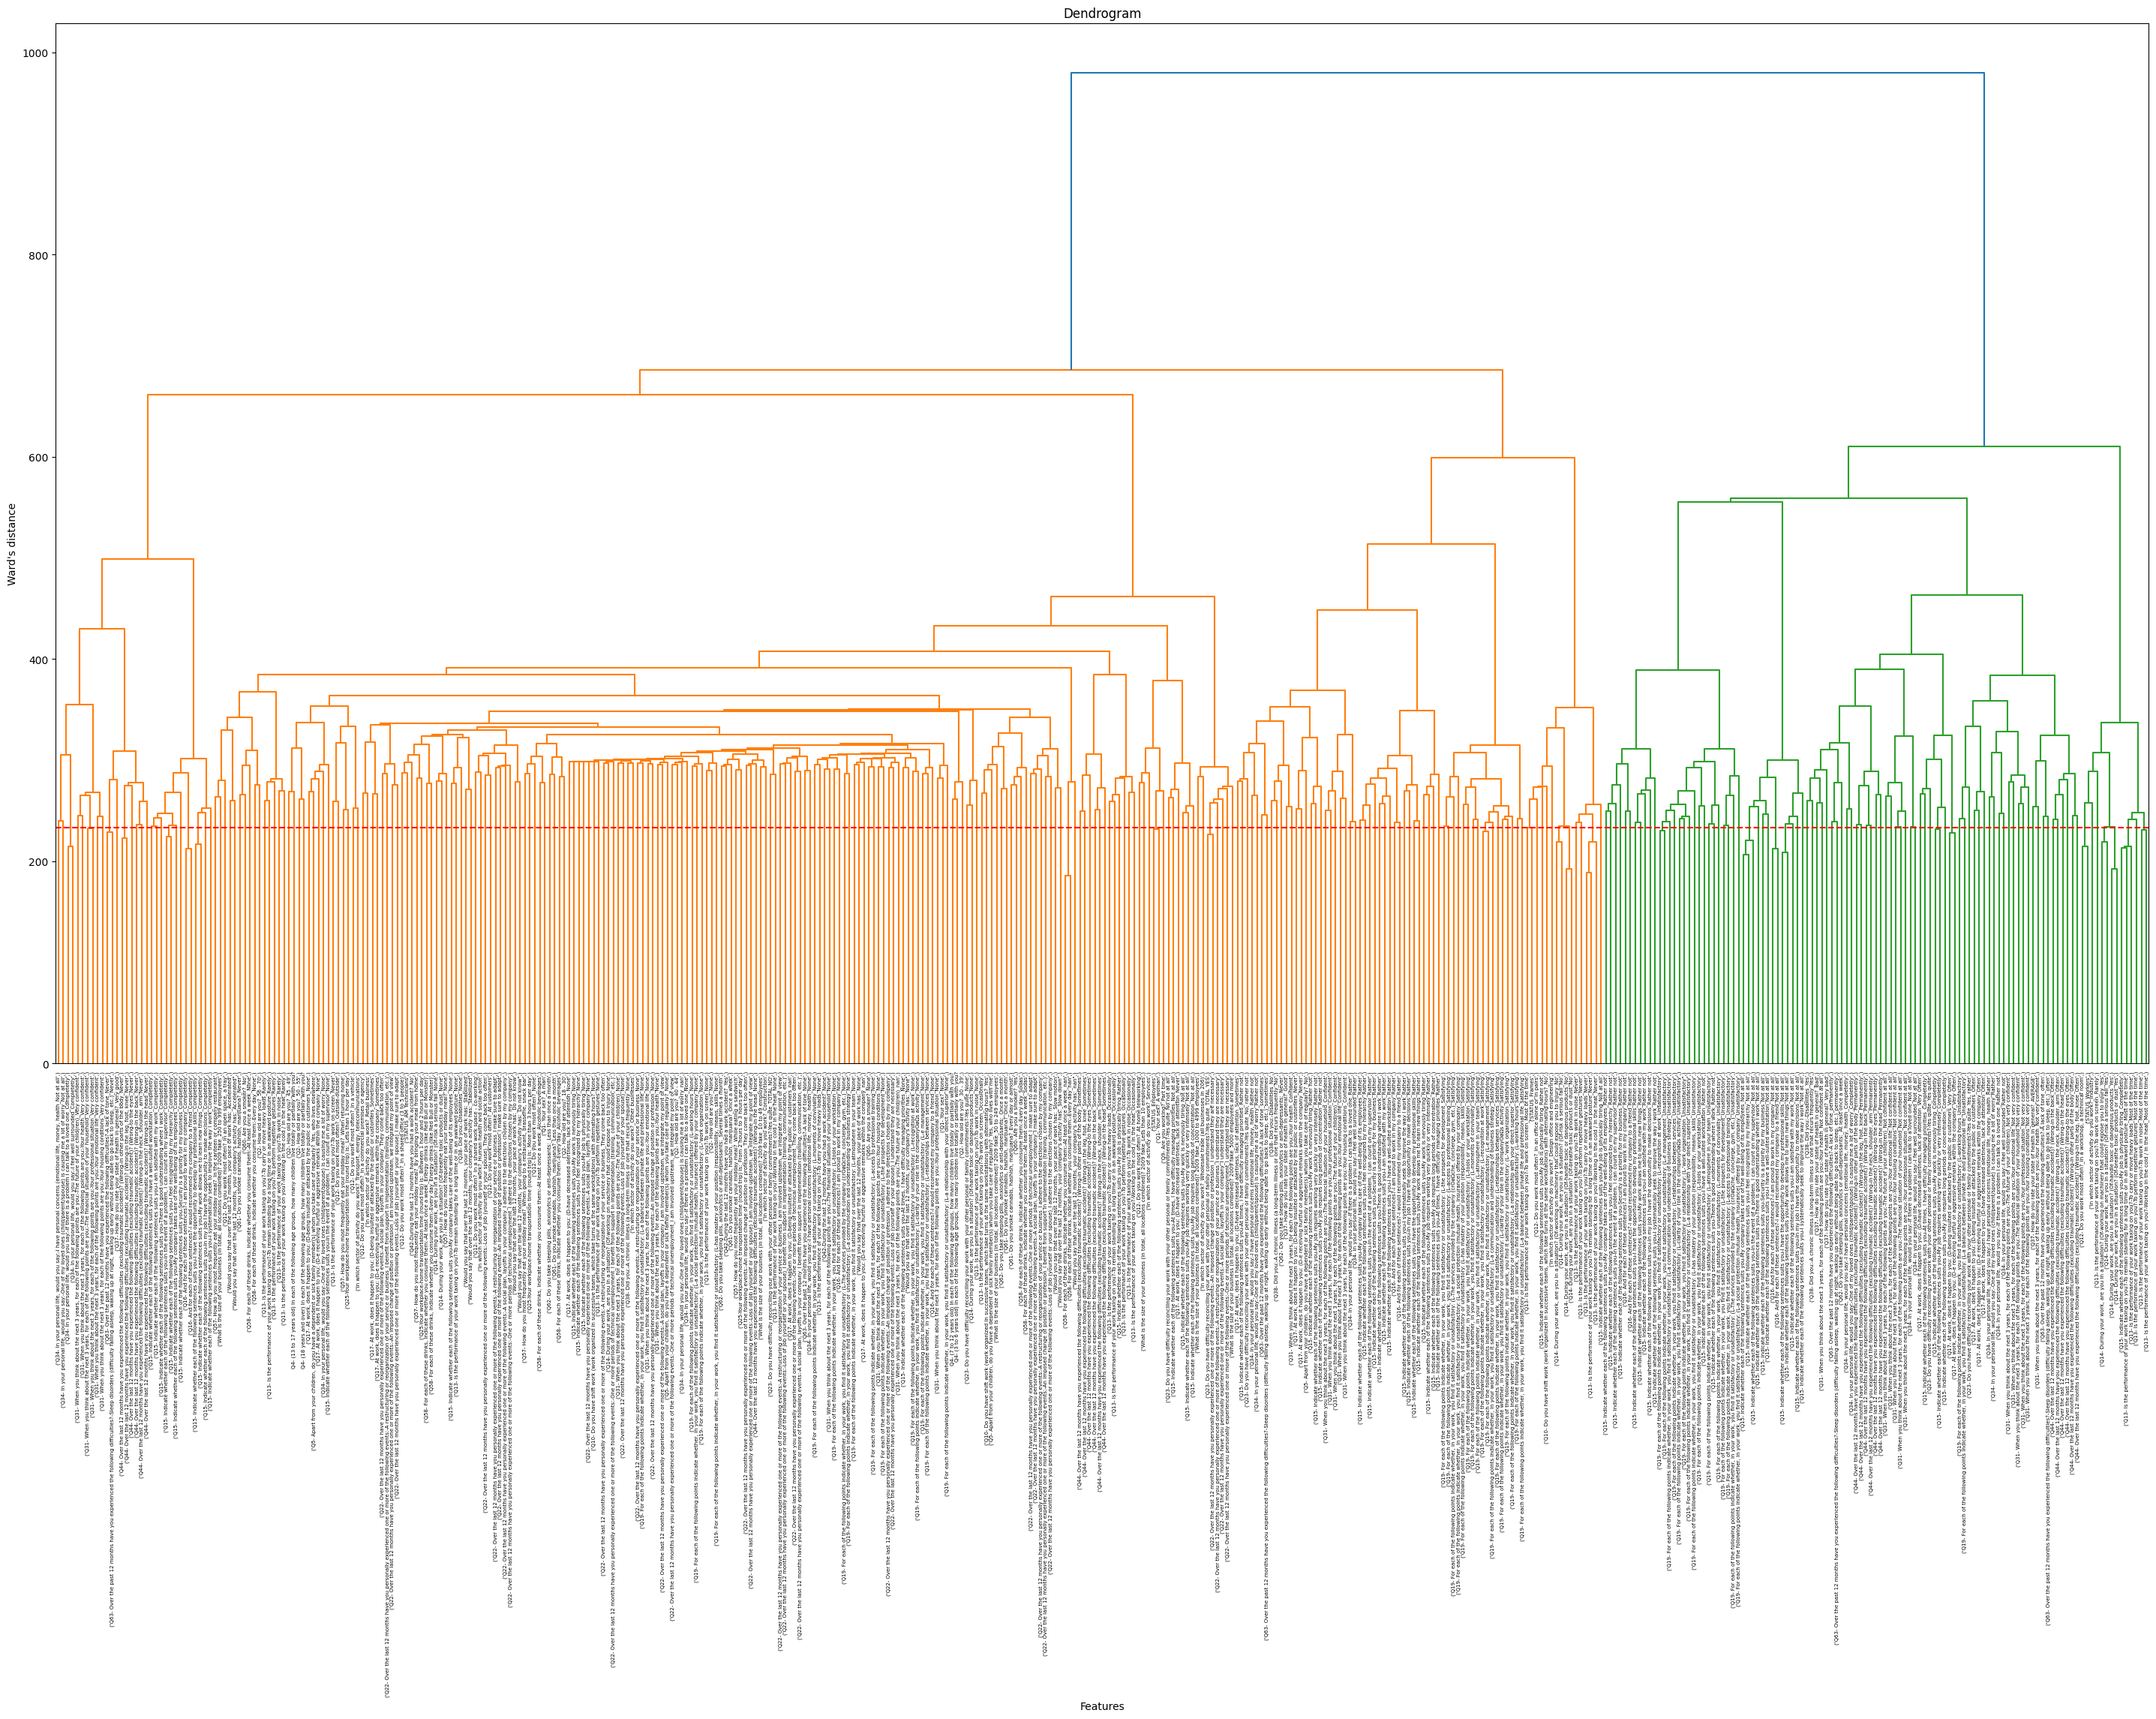

In [14]:
# Create a dendrogram to visualize the feature clustering
plt.figure(figsize=(36, 18)) 
plt.title('Hierarchical Clustering Dendrogram')

dendrogram(linked ,
            orientation='top', 
            labels=df_transposed.index,
            distance_sort='descending', 
            show_leaf_counts=True)
plt.axhline(y=threshold, color='r', linestyle='--')
# 45 degree angle for x axis labels
plt.xticks(rotation=90)
plt.title('Dendrogram')
plt.xlabel('Features')
plt.ylabel("Ward's distance")

plt.savefig('outputs/01_01_feat_cluster/dendrogram.png')

In [15]:
num_clusters = 50 # Adjust the number of clusters as needed (try 2, 3, 4, 8, 9 etc.)

labels = fcluster(linked, t=num_clusters, criterion='maxclust')

In [16]:
df_features_cleaned = df_features.copy()

# Clean the column names by replacing spaces and special characters with underscores
df_features_cleaned.columns = [str(col).replace(' ', '_').replace('?', '').replace('-', '_').replace('(', '').replace(')', '') for col in df_features.columns]

# Find correlation between features and outcome
correlations = []
for col in df_features_cleaned.columns:
    corr = data['outcome'].corr(df_features_cleaned[col])
    corr = round(corr, 3)
    correlations.append(corr)

In [17]:
df_clusters = pd.DataFrame(list(zip(df_features.columns , labels , correlations)),
                          columns=['feature','cluster','corr'])

df_clusters['abs_corr'] = df_clusters['corr'].abs()

df_clusters.sort_values(by=['cluster','abs_corr'], ascending=[True,False], inplace=True) 
df_clusters.reset_index(drop=True, inplace=True)
df_clusters.head(10)

,feature,cluster,corr,abs_corr
0,('Q13- Is the performance of your work taxing ...,1,0.116,0.116
1,('Q15- Indicate whether each of the following ...,1,0.107,0.107
2,('Q13- Is the performance of your work taxing ...,1,0.103,0.103
3,('Q13- Is the performance of your work taxing ...,1,0.095,0.095
4,('Q13- Is the performance of your work taxing ...,1,0.094,0.094
5,('Q13- Is the performance of your work taxing ...,1,0.080,0.080
6,"('STATUS_Workers',)",2,0.104,0.104
7,"('Q14- During your work, are you in a situatio...",2,0.091,0.091
8,"('Q12- Do you work most often?_In a workshop, ...",2,0.087,0.087
9,"('Q14- During your work, are you in a situatio...",2,0.080,0.080


In [18]:
c2_features = df_clusters[df_clusters['cluster']==2]['feature'].tolist() 
c3_features = df_clusters[df_clusters['cluster']==3]['feature'].tolist()

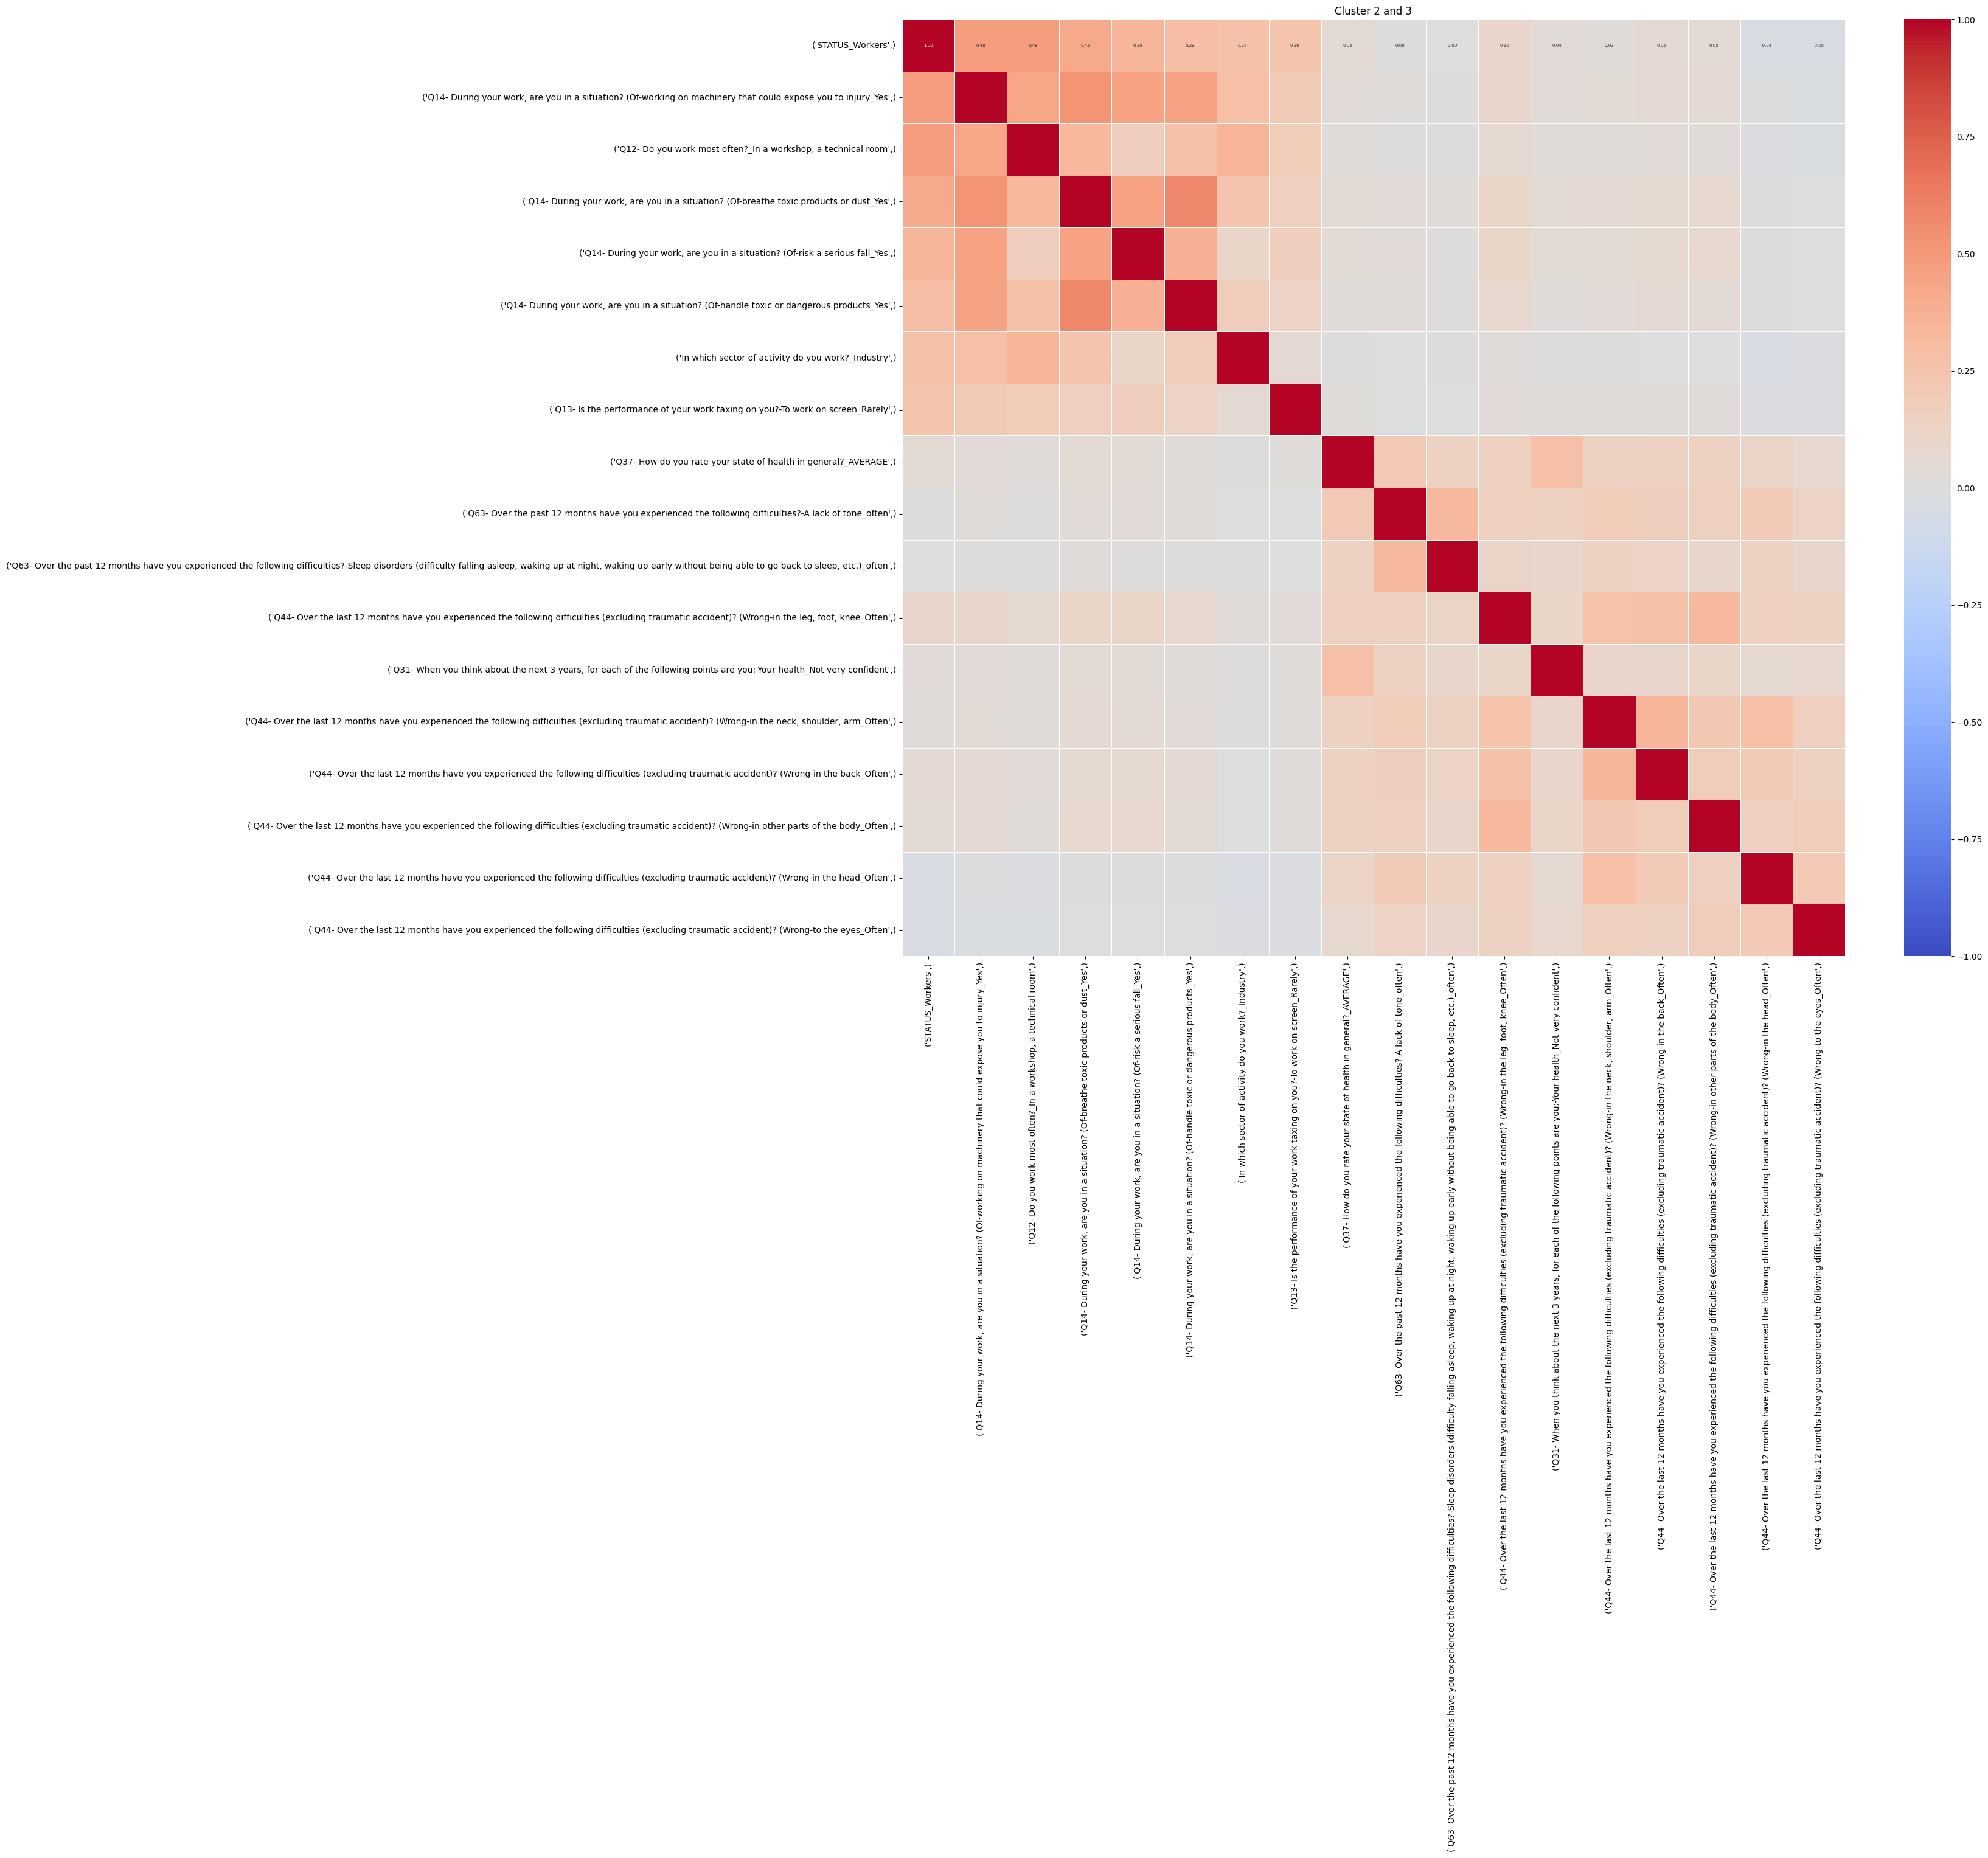

In [19]:
# Plot correlations for features in clusters 2 and 3
corr = df_features[np.append(c2_features ,c3_features)].corr()

# plot correlation matrix with correlation values in all cells
plt.figure(figsize=(25, 20)) 
sns.heatmap(corr,
            annot=True,
            cmap='coolwarm',
            linewidths=0.5, 
            fmt=".2f",
            annot_kws={"size": 5}, 
            vmin=-1, vmax=1)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Cluster 2 and 3')


plt.savefig('outputs/01_01_feat_cluster/corr_cluster_2_3.png')

In [20]:
df_clusters.to_csv('outputs/01_01_feat_cluster/feature_clusters.csv', index=False, header=True, sep=';')

In [21]:
# print the features in each cluster

for i in range(1, num_clusters+1):
    print(f'Cluster {i}:')
    print(f"{df_clusters[df_clusters['cluster']==i]['feature'].values}, corr: {df_clusters[df_clusters['cluster']==i]['corr'].values}")
    print('\n')

Cluster 1:
["('Q13- Is the performance of your work taxing on you?-To work in noise_Most of the time',)"
 "('Q15- Indicate whether each of the following sentences suits you-My job is physically tiring_Completetly',)"
 "('Q13- Is the performance of your work taxing on you?-To perform repetitive gestures_Most of the time',)"
 "('Q13- Is the performance of your work taxing on you?-To carry or move heavy loads_Most of the time',)"
 "('Q13- Is the performance of your work taxing on you?-To remain standing for a long time or in an awkward posture_Most of the time',)"
 "('Q13- Is the performance of your work taxing on you?-Working in the cold / in the heat_Most of the time',)"], corr: [0.116 0.107 0.103 0.095 0.094 0.08 ]


Cluster 2:
["('STATUS_Workers',)"
 "('Q14- During your work, are you in a situation? (Of-working on machinery that could expose you to injury_Yes',)"
 "('Q12- Do you work most often?_In a workshop, a technical room',)"
 "('Q14- During your work, are you in a situation? (Of